# Introducción a Numpy

<img src='figuras/numpy_logo.png' width="50%"/>

NumPy es el paquete fundamental para la computación científica con Python. Contiene, entre otras cosas:

* un poderoso objeto de matrice de N-dimensiones
* funciones sofisticadas (broadcasting)
* herramientas para integrar el código C/C ++ y Fortran
* capacidades utiles en álgebra lineal, transformada de Fourier y números aleatorios

Además de sus usos científicos obvios, NumPy también se puede usar como un contenedor multidimensional eficiente de datos genéricos. Se pueden definir tipos de datos arbitrarios. Esto permite a NumPy integrarse de manera rápida y sin problemas con una amplia variedad de bases de datos.

## Diferencia entre una variable en C y en Python

La diferencia entre una variable C (estoy usando C como un representante para lenguajes compilados) y una variable Python se resume en este diagrama:

<img src="figuras/cint_vs_pyint.png" width="50%">

## ¿Porqué es Python más lento que C en operaciones numéricas?

Si escribimos el siguiente código en C:

/* código C */

int a = 1;

int b = 2;

int c = a + b;

El compilador C sabe desde el principio que a y b son enteros: simplemente no pueden ser otra cosa! Con este conocimiento, puede llamar a la rutina que suma dos enteros, devolviendo otro entero que es simplemente un valor simple en la memoria. La secuencia de eventos es más o menos así:

### Suma en C

    Asignar <int> 1 a a
    Asignar <int> 2 a b
    llamar binary_add<int, int>(a, b)
    Asignar el resultado a c

El código equivalente en Python se ve así:

/# código python

a = 1

b = 2

c = a + b

Aquí el intérprete sólo sabe que 1 y 2 son objetos, pero no qué tipo de objeto son. El intérprete debe inspeccionar PyObject_HEAD para cada variable para encontrar la información de tipo y, a continuación, llamar a la rutina de suma adecuada para los dos tipos. Finalmente, debe crear e inicializar un nuevo objeto Python para contener el valor devuelto. La secuencia de eventos es más o menos así:

### Suma en Python 

    Asignar 1 a a

    1a. Fijar a->PyObject_HEAD->typecode a entero
    1b. Fijar a->val = 1

    Asignar 2 to b

    2a. Fijar b->PyObject_HEAD->typecode a entero
    2b. Fijar b->val = 2

    llamar binary_add(a, b)

    3a. encontrar typecode en a->PyObject_HEAD
    3b. a es un entero; valor es a->val
    3c. encontrar typecode en b->PyObject_HEAD
    3d. b es un entero; valor es b->val
    3e. llamar binary_add<int, int>(a->val, b->val)
    3f. resultado es un entero.

    Crear un objeto Python c

    4a. Fijar c->PyObject_HEAD->typecode a entero
    4b. Fijar c->val a resultado

El tipado dinámico significa que hay muchos más pasos implicados con cualquier operación. Esta es una razón principal por la cual Python es lento comparado con C para operaciones con datos numéricos.

## Numpy

Numpy es la biblioteca principal para la computación científica en Python. Proporciona un objeto arreglo multidimensional de alto rendimiento y herramientas para trabajar con estos arreglos.

Para usar Numpy, Primero necesitamos importar el paquete `numpy`:

In [1]:
import numpy as np

### Arreglos

Una matriz numpy es una cuadrícula de valores, todos del mismo tipo, e indexada por una tupla de enteros no negativos. El número de dimensiones es el rango de la matriz; La forma de una matriz es una tupla de enteros que da el tamaño de la matriz a lo largo de cada dimensión.

Una matriz NumPy en su forma más simple es un objeto Python construido alrededor de una matriz C. Es decir, tiene un puntero a un búfer de datos contiguo de valores. Una lista de Python, por otro lado, tiene un puntero a un búfer contiguo de punteros, cada uno de los cuales apunta a un objeto Python que a su vez tiene referencias a sus datos (en este caso, enteros). Como se muestra en le siguiente esquema:

<img src="figuras/Picture1.png" width="75%">

Podemos inicializar la matriz numpy de las listas anidadas de Python y acceder a los elementos usando corchetes:

In [2]:
a = np.array([1, 2, 3])  # Crear un arreglo de orden 1
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Cambiar un elemento del arreglo
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Crear un arreglo de orden 2 (matriz)
print(b)

[[1 2 3]
 [4 5 6]]


In [4]:
print (b.shape)                   
print (b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy también proporciona muchas funciones para crear matrices:

In [5]:
a = np.zeros((2,2))  # Crear una matriz de ceros
print (a)

[[ 0.  0.]
 [ 0.  0.]]


In [6]:
b = np.ones((1,2))   # Crear una matriz de unos
print (b)

[[ 1.  1.]]


In [7]:
c = np.full((2,2), 7) # Crear una matriz de constantes
print (c) 

[[ 7.  7.]
 [ 7.  7.]]


/Users/wladimir/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((2, 2), 7) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [8]:
d = np.eye(2)        # Crear una matriz de indentidad 2x2
print (d)

[[ 1.  0.]
 [ 0.  1.]]


In [9]:
e = np.random.random((2,2)) # Crear una matriz con valores aleatorios
print (e)

[[ 0.89661879  0.88807479]
 [ 0.92621052  0.89295386]]


In [10]:
f = np.empty((2, 3))  # Crear una matriz vacía, con valores residuales de la memoria
print (f)

[[  4.94065646e-324   9.88131292e-324   1.48219694e-323]
 [  1.97626258e-323   2.47032823e-323   2.96439388e-323]]


### Indexado de las matrices

Numpy ofrece varias formas de indexar las matrices.

Rebanado: Similar a las listas de Python, las matrices numpy se pueden cortar. Dado que las matrices pueden ser multidimensionales, debe especificar una división para cada dimensión de la matriz:

In [11]:
import numpy as np

# Crear la siguiente matriz de orden 2 con forma (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Usando rebanado extraer la sub-matrix que consta de las primeras 2 filas
# y las columnas 1 y 2
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print (b)

[[2 3]
 [6 7]]


Una porción de una matriz es una vista de los mismos datos, por lo que la modificación modificará la matriz original.

In [12]:
print (a[0, 1])  
b[0, 0] = 77    # b[0, 0] es el mismo dato que a[0, 1]
print (b) 

2
[[77  3]
 [ 6  7]]


También puede mezclar índices enteros con indexación por sectores. Sin embargo, al hacerlo, se obtendrá una matriz de menor orden que la matriz original:

In [ ]:
# Crear la siguiente matrix de orden 2 con forma (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print (a)

Dos formas de acceder a los datos en la fila central de la matriz. La mezcla de índices enteros con rebanadas produce una matriz de menor orden, mientras que el uso de sólo rebanadas produce una matriz del mismo orden que la matriz original:

In [13]:
row_r1 = a[1, :]    # Orden 1 vista de la segunda fila de a  
row_r2 = a[1:2, :]  # Orden 2 vista de la segunda fila de a
row_r3 = a[[1], :]  # Orden 2 vista de la segunda fila de a
print (row_r1, row_r1.shape) 
print (row_r2, row_r2.shape)
print (row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [14]:
# Podemos hacer la misma distinción al acceder a las columnas de una matriz:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print (col_r1, col_r1.shape)
print
print (col_r2, col_r2.shape)

[77  6 10] (3,)
[[77]
 [ 6]
 [10]] (3, 1)


Indexación de matriz con números enteros: Cuando se indexa en matrices numpy utilizando rebanado, la vista de la matriz resultante siempre será una sub-matriz de la matriz original. Por el contrario, la indización de matriz con números enteros permite construir matrices arbitrarias utilizando los datos de otra matriz. Por ejemplo:

In [15]:
a = np.array([[1,2], [3, 4], [5, 6]])

# Un ejemplo con indezado entero.
# La matriz resultante tendra la forma (3,) y 
print (a[[0, 1, 2], [0, 1, 0]])

# El ejemplo de arriba con indexado entero es equivalente a:
print (np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [16]:
# Cuando utilice la indización de matriz con números enteros, puede reutilizar el mismo
# elemento de la matriz original:
print (a[[0, 0], [1, 1]])

# Equivalente al ejemplo previo de indexado de matriz con números enteros
print (np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


Un truco útil con la indización de matriz con números enteros es la selección o mutación de un elemento de cada fila de una matriz:

In [17]:
# Crear una matriz de la cual seleccionaremos elementos
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [18]:
# Crear un arreglo de indices
b = np.array([0, 2, 0, 1])

# Seleccionar un elemento de cada fila usando los indices en b
print (a[np.arange(4), b])  # Imprime "[ 1  6  7 11]"

[ 1  6  7 11]


In [19]:
# Mutar un elemento de cada fila de a usando los índices en b
a[np.arange(4), b] += 10
print (a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Indexación boolena de matriz: La indexación boleana de matriz permite seleccionar elementos arbitrarios de una matriz. Con frecuencia, este tipo de indexación se utiliza para seleccionar los elementos de una matriz que satisfacen alguna condición. Por ejemplo:

In [20]:
#import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Encontrar los elementos de a que sean mayores que 2;
                    # Esto devuelve una matriz numpy de booleanos con la misma
                    # forma que a, donde cada celda de bool_idx indica
                    # si ese elemento de a es > 2.

print (bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [21]:
# Utilizamos indexación booleana de matriz para construir una matriz de rango 1
# Consistente en los elementos de a correspondientes a los valores Verdaderos
# de bool_idx
print (a[bool_idx])

# Podemos hacer todo lo anterior en una sola declaración concisa:
print (a[a > 2])

[3 4 5 6]
[3 4 5 6]


### Tipos de Datos

Cada matriz numpy es una cuadrícula de elementos del mismo tipo. Numpy proporciona un gran diversidad de tipos de datos numéricos que puede utilizar para construir matrices. Numpy intenta adivinar un tipo de datos cuando se crea una matriz, pero las funciones que construyen matrices también suelen incluir un argumento opcional para especificar explícitamente el tipo de datos. Por ejemplo:

In [22]:
x = np.array([1, 2])  # Deja que numpy elija el tipo de datos
y = np.array([1.0, 2.0])  # Deja que numpy elija el tipo de datos
z = np.array([1, 2], dtype=np.float64)  # Forzar un tipo de datos particular

print (x.dtype, y.dtype, z.dtype)

int64 float64 float64


Puede leer todo acerca de los tipos de datos numpy en la [documentación](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Matemática con Matrices

Las funciones matemáticas básicas operan por cada elemento de las matrices, y están disponibles tanto como operadores sobrecargados o como funciones en el módulo numpy:

In [23]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Suma por elementos; ambas producen la matriz
print (x + y)
print (np.add(x, y))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [24]:
# Resta por elementos; ambas producen la matriz
print (x - y)
print (np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [25]:
# Multiplicación por elementos; ambas producen la matriz
print (x * y)
print (np.multiply(x, y))

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [26]:
# División por elementos; ambas producen la matriz
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [27]:
# Raiz cuadrada por elementos; produce la matriz
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Tenga en cuenta que a diferencia de MATLAB, * es multiplicación elemento por elemento, no es multiplicación de matrices. Utilizamos la función `dot` para calcular productos internos de vectores, multiplicar un vector por una matriz y multiplicar matrices. `dot` está disponible tanto como una función en el módulo `numpy` como un método de instancia de objetos de matriz:

In [28]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Producto interno de vectores; ambas producen 219
print (v.dot(w))
print (np.dot(v, w))

219
219


In [ ]:
# Producto de Matriz por vector; ambas producen la matrix de rango 1 [29 67]
print (x.dot(v))
print (np.dot(x, v))

In [29]:
# Producto de Matriz por Matriz; ambas producen la matrix de rango 1
# [[19 22]
#  [43 50]]
print (x.dot(y))
print (np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy proporciona muchas funciones útiles para realizar cálculos en matrices; Una de los más útiles es `sum`:

In [30]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))  # Calcular la suma de todos los elementos; imprime "10"
print (np.sum(x, axis=0))  # Calcular la suma de cada columna; imprime "[4 6]"
print (np.sum(x, axis=1))  # Calcular la suma de cada fila; imprime "[3 7]"

10
[4 6]
[3 7]


Puede encontrar las funciones matemáticas proporcionadas por numpy en la [documentación](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Aparte de la computación de funciones matemáticas utilizando matrices, con frecuencia necesitamos cambiar la forma o de otra manera manipular datos en matrices. El ejemplo más simple de este tipo de operación es la transposición de una matriz; Para transponer una matriz, simplemente use el atributo T de un objeto de matriz:

In [31]:
print (x)
print (x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [32]:
v = np.array([[1,2,3]])
print (v) 
print (v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting es un potente mecanismo que permite a numpy trabajar con matrices de diferentes formas al realizar operaciones aritméticas. Con frecuencia tenemos una matriz más pequeña y una matriz más grande, y queremos usar la matriz más pequeña varias veces para realizar alguna operación en la matriz más grande.

Por ejemplo, supongamos que queremos agregar un vector constante a cada fila de una matriz. Podríamos hacerlo así:

In [33]:
# Sumar el vector v a cada fila de la matriz x,
# almacenando el resultado en la matriz y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Crear una matriz vacía con la misma forma que x

# Sume el vector v a cada fila de la matriz x con un bucle explícito
for i in range(4):
    y[i, :] = x[i, :] + v

print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Esto funciona; Sin embargo, cuando la matriz `x` es muy grande, el cálculo de un bucle explícito en Python podría ser lento. Tenga en cuenta que la adición del vector `v` a cada fila de la matriz `x` es equivalente a formar una matriz `vv` apilando múltiples copias de `v` verticalmente, realizando entonces la suma elemental de `x` y `vv`. Podríamos implementar este enfoque de la siguiente manera:

In [34]:
vv = np.tile(v, (4, 1))  # Apilar 4 copias de v una encima de otra
print (vv)               # Imprime "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [35]:
y = x + vv  # Sumar x y vv elemento por elemento
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting nos permite realizar este cálculo sin realmente crear múltiples copias de `v`. Considere esta versión, utilizando la broadcasting:

In [36]:
# Sumar el vector v a cada fila de la matriz x,
# almacenando el resultado en la matriz y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Sumar v a cada fila de x usando broadcasting
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


La línea `y = x + v` funciona a pesar que `x` tiene forma `(4, 3)` y `v` tiene forma `(3,)` debido al broadcasting; esta línea funciona como si `v` tubiese la forma `(4, 3)`, donde cada fila es una copia de `v`, y la suma se realiza elemento por elemento.

Broadcasting dos matrices sigue las siguientes reglas:

1. Un escalar siempre se puede operar con cualquier matriz.
2. Dos dimensiones son compatibles en las operaciones aritméticas cuando son iguales o cuando una de ellas es 1. Los tamaños de las dimensiones que son 1 se extienden hasta completar el tamaño de la otra matriz.
3. Cuando el número de dimensiones de las matrices es diferente, se compara el tamaño de las dimensiones empezando por la derecha, y entonces los tamaños deben ser iguales, extendiéndose la matriz más corta hasta completar el tamaño de la más larga.
4. Las reglas anteriores pueden combinarse

Puede encontrar todo los refenente a broadcasting en la [documentación](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Funciones que permiten broadcasting son conocidas como funciones universales. Puede encontrar la lista de todas las funciones universales en la [documentación](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

A continuación están algunas aplicaciones de broadcasting:

In [37]:
# Calcular el producto externo de los vectores
v = np.array([1,2,3])  # v tiene forma (3,)
w = np.array([4,5])    # w tiene forma (2,)
# Para calcular un producto externo, primero reformamos v para que sea un vector
# columna con forma (3, 1); despues lo podemos broadcast con w para obtener
# una salida con forma (3, 2), que es el producto externo de v y w:

print (np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [38]:
# Sumar un vector a cada fila de una matriz 
x = np.array([[1,2,3], [4,5,6]])
# x tiene forma (2, 3) y v tiene forma (3,) asi que se obtiene una salida (2, 3),
# con la siguiente matriz:

print (x + v)

[[2 4 6]
 [5 7 9]]


In [39]:
# Sumar un vector a cada columna de una matriz
# x tiene forma (2, 3) y w tien forma (2,).
# Si le aplicamos la transpuesta a x entonces tiene forma (3, 2) y lo podemos broadcast
# con w para obtener un resultado con forma (3, 2); aplicando la transpuesta a este resultado
# obtenemos el resultado final con forma (2, 3) que es la matriz x con
# el vector w sumado a cada columna. Obteniendo la siguiente matriz:

print ((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [40]:
# Otra solución es reformar w para que sea un vector por fila con la forma (2, 1);
# entonces lo podemos broadcast directamente con x para producir la misma
# salida.
print (x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [41]:
# Multiplicar una matriz por una constante:
# x tiene forma (2, 3). Numpy trata los escalares como matrices con forma ();
# esto puede ser broadcast con forma (2, 3), produciendo la
# siguiente matriz:
print (x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Por lo general, broadcasting hace que su código sea más conciso y rápido, por lo que debe esforzarse por utilizarlo cuando sea posible.

Este breve resumen ha tocado muchas de las cosas importantes que usted necesita saber acerca de numpy, pero está lejos de ser completa. Revise la [referencia de numpy](http://docs.scipy.org/doc/numpy/reference/) aara averiguar mucho más sobre numpy.

(array([  1.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          1.30000000e+01,   5.10000000e+01,   1.23000000e+02,
          2.65000000e+02,   4.58000000e+02,   7.88000000e+02,
          1.17500000e+03,   1.43100000e+03,   1.51700000e+03,
          1.41000000e+03,   1.12600000e+03,   7.69000000e+02,
          4.74000000e+02,   2.39000000e+02,   1.14000000e+02,
          2.90000000e+01,   1.10000000e+01]),
 array([-4.41679524, -4.03124108, -3.64568693, -3.26013277, -2.87457862,
        -2.48902446, -2.10347031, -1.71791615, -1.33236199, -0.94680784,
        -0.56125368, -0.17569953,  0.20985463,  0.59540878,  0.98096294,
         1.3665171 ,  1.75207125,  2.13762541,  2.52317956,  2.90873372,
         3.29428788]),
 <a list of 20 Patch objects>)

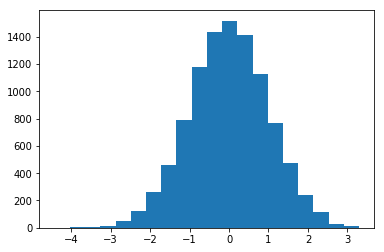

In [48]:
# Graficar histogramas
x = np.random.randn(10000)  # Definimos un vector de números aleatorios de una distribución normal
plt.hist(x, bins = 20)  # Dibuja un histograma dividiendo el vector x en 20 intervalos

### Subplots 

Puedes graficar diferentes cosas en la misma figura usando la función `subplot`. Por ejemplo:

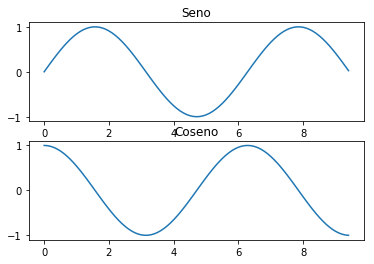

In [49]:
# Calcular las coordenadas x e y de los puntos de las curvas seno y coseno
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Configure una reticula subplot con altura 2 y ancho 1,
# y seleccione el primer subplot como activo.
plt.subplot(2, 1, 1)

# Realice el primer gráfico
plt.plot(x, y_sin)
plt.title('Seno')

# Seleccione el segundo subplot como activo, y haga el segundo gráfico.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Coseno')

# Muestre la figura.
plt.show()

Puedes leer mucho más sobre la función `subplot` en la [documentación](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

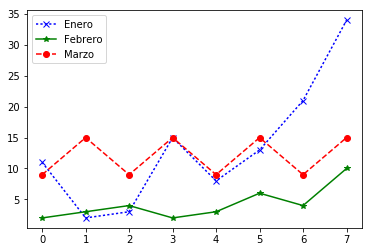

In [55]:
# Configurar estilo de las líneas
lista1 = [11,2,3,15,8,13,21,34]
lista2 = [2,3,4,2,3,6,4,10]
lista3 = [9,15,9,15,9,15,9,15]
plt.plot(lista1, marker='x', linestyle=':', color='b', label = "Enero")
plt.plot(lista2, marker='*', linestyle='-', color='g', label = "Febrero")
plt.plot(lista3, marker='o', linestyle='--', color='r', label = "Marzo")
plt.legend()

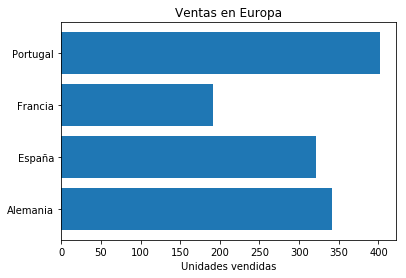

In [56]:
# Gráficos de Barras Horizontales
paises = ("Alemania", "España", "Francia", "Portugal")
posicion_y = np.arange(len(paises))
unidades = (342, 321, 192, 402)
plt.barh(posicion_y, unidades, align = "center")
plt.yticks(posicion_y, paises)
plt.xlabel('Unidades vendidas')
plt.title("Ventas en Europa")

([<matplotlib.axis.XTick at 0x10a9dd278>,
 <a list of 4 Text xticklabel objects>)

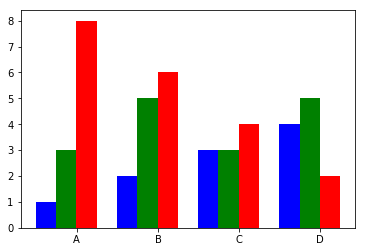

In [57]:
# Gráficos de Multiples Barras Verticales
datos = [[1, 2, 3, 4], [3, 5, 3, 5], [8, 6, 4, 2]]
X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25)
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25)
plt.bar(X + 0.50, datos[2], color = "r", width = 0.25)
plt.xticks(X+0.38, ["A","B","C","D"])

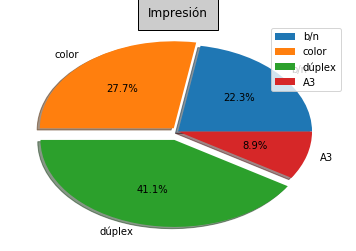

In [60]:
# Gráficos de Torta
impr = ["b/n", "color", "dúplex", "A3"]
vol = [25, 31, 46, 10]
expl =(0, 0.05, 0.1, 0)
plt.pie(vol, explode=expl, labels=impr, autopct='%1.1f%%', shadow=True)
plt.title("Impresión", bbox={"facecolor":"0.8", "pad":10})
plt.legend()

In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())

/Users/wladimir/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
